# Analiza rzutu ukośnego

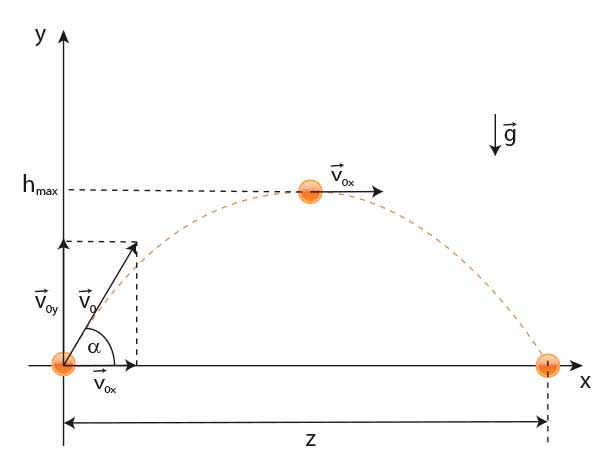

In [1]:
using Plots

In [2]:
# dane
g = 9.81
m = 2
v₀ = 30
α = π / 4

# obliczenia
hₘ = ((v₀ * sin(α))^ 2) / (2 * g) 
czas = (2 * v₀ * sin(α)) / g
zasieg = (v₀ ^ 2 * sin(2 * α)) / g

91.74311926605505

# 1. Bez uwzględnienia oporów powietrza

$$v_x(t)=v_o\cos{\alpha}$$

$$v_y(t)=v_o\sin{\alpha} - gt$$

Układ równań opisujących tor obiektu w rzucie ukośnym z oporem powietrza:

$$x(t)=(v_o\cos{\alpha})t $$

$$y(t)=(v_o\sin{\alpha})t-\frac{1}{2}gt^2$$

In [3]:
function x(v₀, α)
    t -> v₀ * t * cos(α)
end

function y(v₀, α, g)
    t -> v₀ * t * sin(α) - (g * t ^ 2) / 2
end

function v_x(v₀, α)
    t -> v₀ * cos(α)
end

function v_y(v₀, α, g)
    t -> v₀ * sin(α) - g * t
end

v_y (generic function with 1 method)

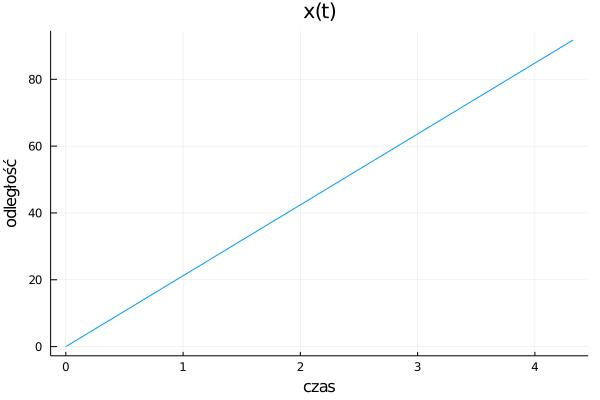

In [4]:
plot(x(v₀, α), 0, czas,
    xlabel = "czas", 
    ylabel = "odległość",
    legend =:none,
    title = "x(t)")

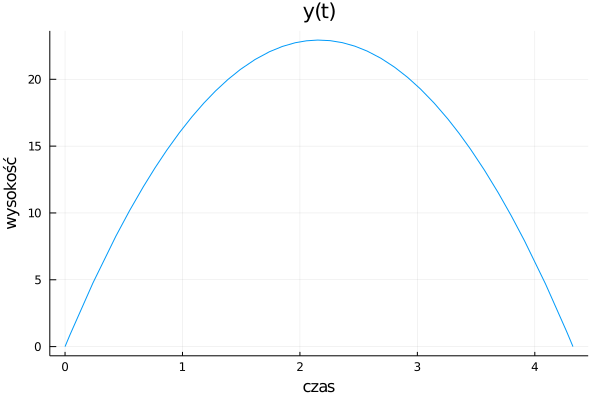

In [5]:
plot(y(v₀, α, g), 0, czas,
    xlabel = "czas", 
    ylabel = "wysokość", 
    legend =:none,
    title = "y(t)")

┌ Info: Saved animation to 
│   fn = C:\Users\Adam2\rzut.gif
└ @ Plots C:\Users\Adam2\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Adam2\\rzut.gif")
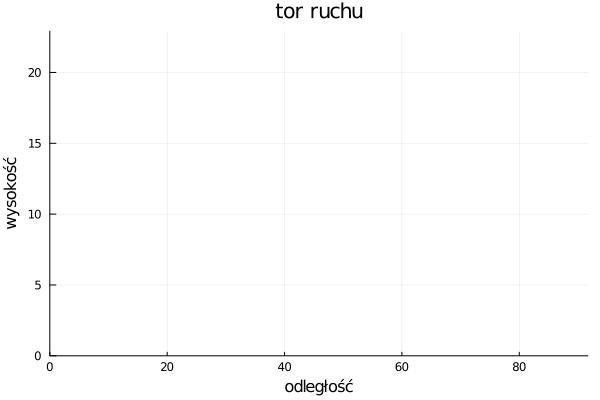

In [6]:
a = @animate for i in LinRange(0, czas, 500)
    plot(x(v₀, α), y(v₀, α, g), 0, i,
        xlabel = "odległość", 
        ylabel = "wysokość",
        xlims = (0, zasieg),
        ylims = (0, hₘ),
        legend =:none,
        title = "tor ruchu")
end

gif(a, "rzut.gif", fps=30)

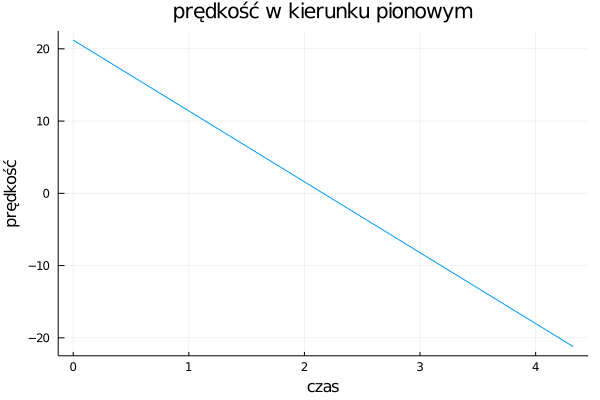

In [7]:
plot(v_y(v₀, α, g), 0, czas,
    xlabel = "czas", 
    ylabel = "prędkość",
    legend =:none,
    title = "prędkość w kierunku pionowym")

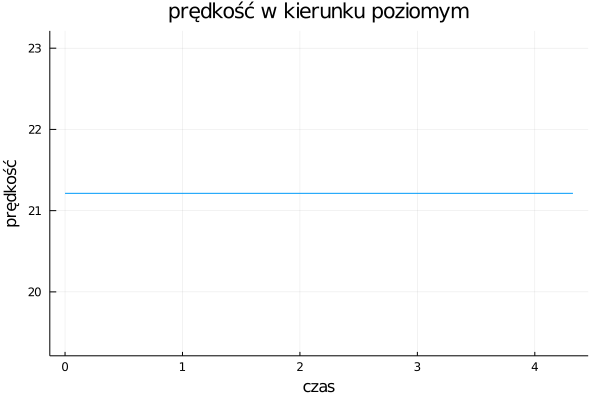

In [8]:
plot(v_x(v₀, α), 0, czas,
    xlabel = "czas", 
    ylabel = "prędkość",
    ylim = (v₀ * cos(α) - 2, v₀ * cos(α) + 2),
    legend =:none,
    title = "prędkość w kierunku poziomym")

# 2. Z uwzględnieniem oporów powietrza

In [9]:
# dane
k = 0.5 #współczynnik oporu

0.5

# a) rozwiązanie analityczne

Siła oporu:

$$D=\frac{1}{2}C{\rho}Sv^2$$

$$D=-kv$$

Układ równań opisujących tor obiektu w rzucie ukośnym z oporem powietrza:

$$x(t)=(\frac{m}{k}v_o\cos{\alpha})(1-e^{\frac{-k}{m}{t}}) $$

$$y(t)=(\frac{m}{k}v_o\sin{\alpha}+\frac{m^{2}}{k^{2}}g)(1-e^{\frac{-k}{m}{t}})-\frac{m}{k}gt$$

In [10]:
function x_opor(m, k, v₀, α)
    t -> m / k * v₀ * cos(α) * (1 - exp((-k / m) * t))
end

function y_opor(m, k, v₀, α, g)
    t -> (m / k * v₀ * sin(α) + (m / k)^2 * g) * (1 - exp((-k / m) * t)) - (m / k) * g * t
end

y_opor (generic function with 1 method)

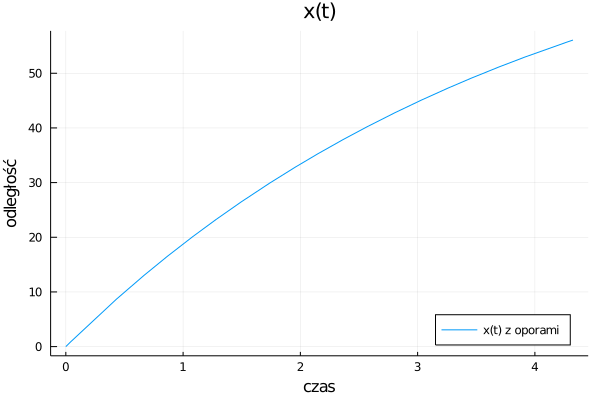

In [11]:
plot(x_opor(m, k, v₀, α), 0, czas,
    xlabel = "czas", 
    ylabel = "odległość", 
    label = "x(t) z oporami",
    legend =:bottomright,
    title = "x(t)")

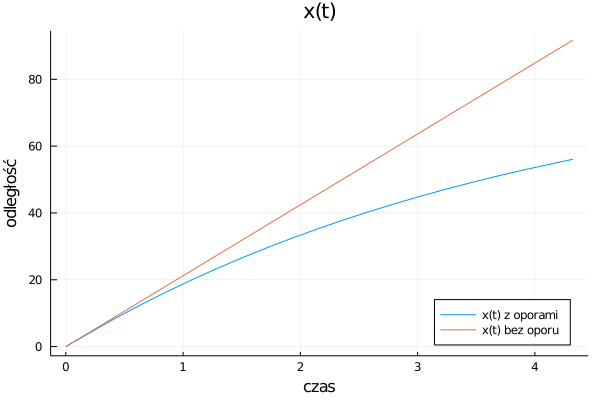

In [12]:
plot!(x(v₀, α), 0, czas,
    label = "x(t) bez oporu")

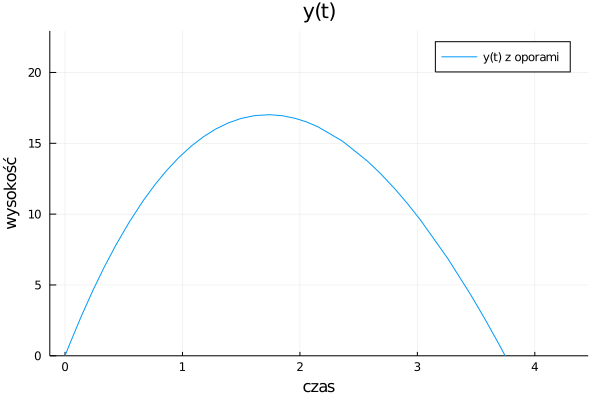

In [13]:
plot(y_opor(m, k, v₀, α, g), 0, czas,
    xlabel = "czas", 
    ylabel = "wysokość", 
    label = "y(t) z oporami",
    legend =:topright,
    ylim = (0, hₘ),
    title = "y(t)")

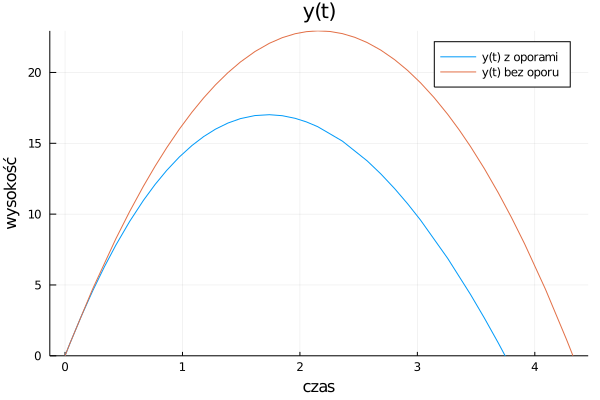

In [14]:
plot!(y(v₀, α, g), 0, czas,
    label = "y(t) bez oporu")

┌ Info: Saved animation to 
│   fn = C:\Users\Adam2\rzut2.gif
└ @ Plots C:\Users\Adam2\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Adam2\\rzut2.gif")
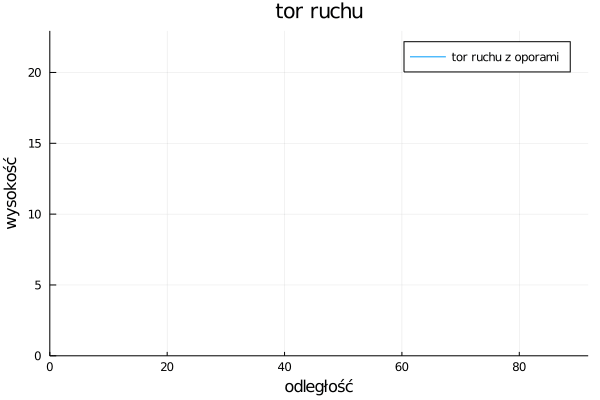

In [15]:
a = @animate for i in LinRange(0, czas, 500)
    plot(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g), 0, i,
    xlabel = "odległość", 
    ylabel = "wysokość",
    label = "tor ruchu z oporami",
    xlims = (0, zasieg),
    ylims = (0, hₘ),
    legend =:topright,
    title = "tor ruchu")
    
end

gif(a, "rzut2.gif", fps=30)

┌ Info: Saved animation to 
│   fn = C:\Users\Adam2\rzut3.gif
└ @ Plots C:\Users\Adam2\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Adam2\\rzut3.gif")
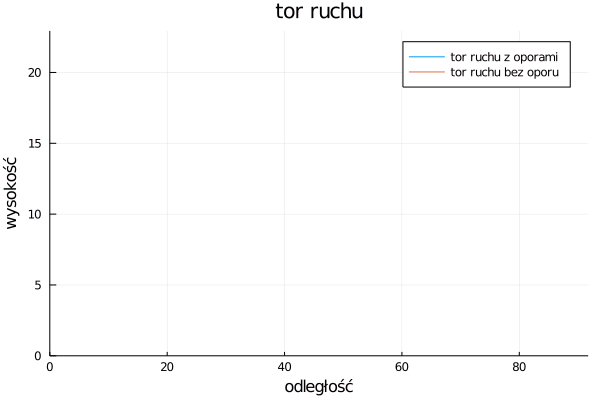

In [16]:
a = @animate for i in LinRange(0, czas, 500)
    plot(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g), 0, i,
    xlabel = "odległość", 
    ylabel = "wysokość",
    label = "tor ruchu z oporami",
    xlims = (0, zasieg),
    ylims = (0, hₘ),
    legend =:topright,
    title = "tor ruchu")
    
    plot!(x(v₀, α), y(v₀, α, g), 0, i,
        label = "tor ruchu bez oporu",
        lims = (0, zasieg),
        ylims = (0, hₘ))
    
end

gif(a, "rzut3.gif", fps=30)

# b) rozwiązanie numeryczne

Koszt obliczeń rozwiązania analitycznygeo może być zbyt duży, z uwagi na występowanie funkcji exp(). Rozwiązanie numeryczne jest bardziej wydajne. Metody numeryczne pozwalają otrzymać zadowalający wynik, minimalnie różniący się od otrzymanego metodami analitycznymi.

# 3. Z uwzględnieniem efektem Magnusa

In [17]:
# dane
g = 9.81
m = 0.045
v₀ = 35
α = π / 9
p = 1.2 
n = 20 
r = 0.02

# obliczenia
hₘ = ((v₀ * sin(α))^ 2) / (2 * g) 
czas = (2 * v₀ * sin(α)) / g
zasieg = (v₀ ^ 2 * sin(2 * α)) / g

80.26654657145878

Wzór na siłę Magnusa dla wirującej kuli:

$$ F=2npv_o \pi^2 r^3$$

Układ równań opisujących tor obiektu w rzucie ukośnym z siłą Magnusa:

$$x(t)=(v_o\cos{\alpha})t $$

$$y(t)=(v_o\sin{\alpha})t-(g-\frac{F}{m})\frac{t^2}{2}$$


In [18]:
F = 2 * n * p * v₀ * pi ^ 2 * r ^ 3
czas_magnus = (2 * v₀ * sin(α)) / (g - (F / m))
zasieg_magnus = (v₀ ^ 2 * sin(2 * α)) / (g - (F / m))
hₘ_magnus = ((v₀ * sin(α))^ 2) / (2 * (g - (F / m)))

10.440977136981765

In [19]:
function x_magnus(v₀, α)
    t -> v₀ * t * cos(α)
end

function y_magnus(v₀, α, g)
    t -> v₀ * t * sin(α) - (g - (F / m))*(t ^ 2)/2
end

y_magnus (generic function with 1 method)

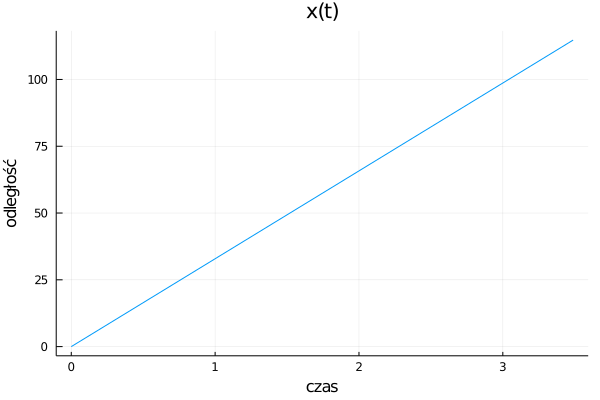

In [20]:
plot(x_magnus(v₀, α), 0, czas_magnus,
    xlabel = "czas", 
    ylabel = "odległość",
    legend =:none,
    title = "x(t)")

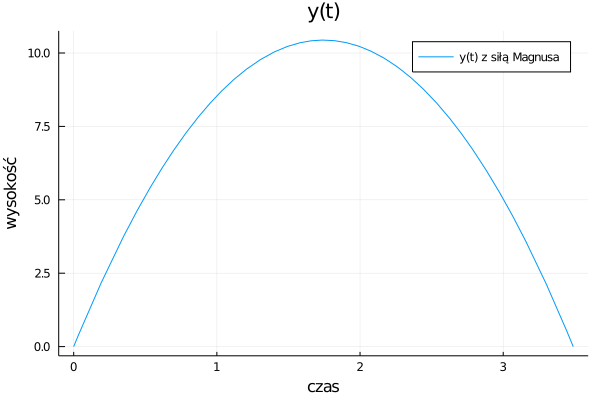

In [21]:
plot(y_magnus(v₀, α, g), 0, czas_magnus,
    xlabel = "czas", 
    ylabel = "wysokość", 
    legend =:topright,
    label = "y(t) z siłą Magnusa",
    title = "y(t)")

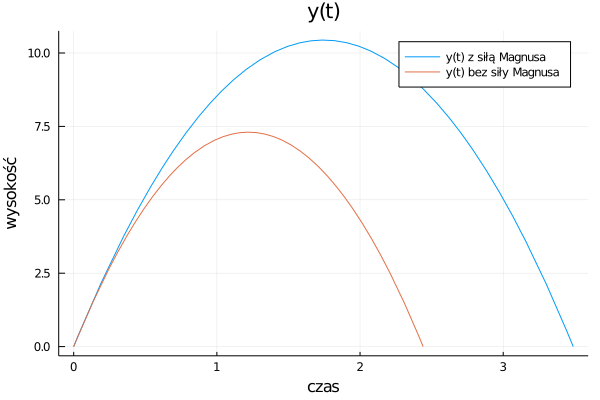

In [22]:
plot!(y(v₀, α, g), 0, czas,
    label = "y(t) bez siły Magnusa")

┌ Info: Saved animation to 
│   fn = C:\Users\Adam2\rzut4.gif
└ @ Plots C:\Users\Adam2\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Adam2\\rzut4.gif")
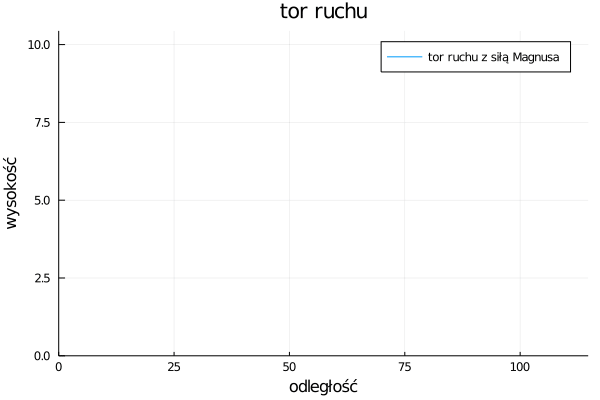

In [23]:
a = @animate for i in LinRange(0, czas_magnus, 500)
    plot(x_magnus(v₀, α), y_magnus(v₀, α, g), 0, i,
    xlabel = "odległość", 
    ylabel = "wysokość",
    label = "tor ruchu z siłą Magnusa",
    xlims = (0, zasieg_magnus),
    ylims = (0, hₘ_magnus),
    legend =:topright,
    title = "tor ruchu")
    
end

gif(a, "rzut4.gif", fps=30)

┌ Info: Saved animation to 
│   fn = C:\Users\Adam2\rzut5.gif
└ @ Plots C:\Users\Adam2\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Adam2\\rzut5.gif")
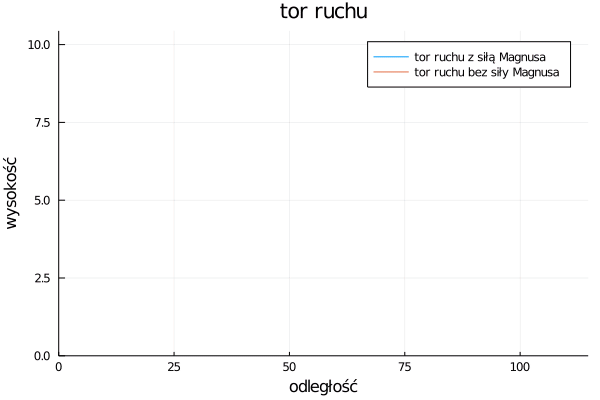

In [24]:
a = @animate for i in LinRange(0, czas_magnus, 500)
    plot(x_magnus(v₀, α), y_magnus(v₀, α, g), 0, i,
    xlabel = "odległość", 
    ylabel = "wysokość",
    label = "tor ruchu z siłą Magnusa",
    xlims = (0, zasieg_magnus),
    ylims = (0, hₘ_magnus),
    legend =:topright,
    title = "tor ruchu")

    plot!(x(v₀, α), y(v₀, α, g), 0, i,
        label = "tor ruchu bez siły Magnusa",
        xlims = (0, zasieg_magnus),
        ylims = (0, hₘ_magnus))
    
end

gif(a, "rzut5.gif", fps=30)